# [Notebook 00] Functions and Gradients

### __Here we are, the first notebook.__

In typical Python fashion, the first element in a sequence has an index of 0.

Actually, the real reason is there are 11 notebooks and the number emojis only up to 🔟.

If there was an 11 emoji this would've been notebook 1.

Anyways, this is the best intro I could come up with and you're here for a very specific reason so let's get started.

### Machine Learning

A heavily used term with an increasingly squishy meaning nowadays, potentially encompassing anything from an Excel line of best fit to OpenAI GPT4.

I define ML as a class of algorithms that attempt to learn rules that map inputs to outputs. What do we call things that map inputs to outputs?

__Functions__ - ML models are essentially (sometimes very large) functions. Neural networks included.

<br><center><b><i> If ML models are just functions, why the hype? Can't we just write out the function? </b></i></center>

Well, we could. For example, its possible to calculate a line of best fit by hand. But as
- data increases in dimensionality
- the relationship between inputs and ouputs becomes convoluted
- the size of our dataset becomes massive
- our model architectures get more complex

... finding a good function becomes increasingly hard, like, calculating 170 trillion parameters hard.

So to answer the question, what makes ML special is that __it can learn the function for us.__

### ML Algorithms

If the model is the function, the algorithm is the logic, the set of instructions/procedures used to update the function to better map inputs to desired outputs.

Different ML algorithms use different logic to learn and different parameters to represent the function (eg. linear regression uses slopes and intercepts).

Good models are the result of iteratively "training" on a dataset using an algorithm, and finding the value of parameters (think slope and intercept) for the function that best maps inputs to outputs. This model can then be used to make predictions on unseen data.

### Why Neural Networks?

- They're really good at predicting things (this is a vast generalization but generally true)
- They're fun to train (especially really big ones)

Perhaps rather anticlimatically we won't be touching neural networks in this notebook. __Lets start with functions.__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Functions

Since ML models are functions, this is our motivation to start the discussion here.

We know a function typically looks something like this:

$$f(x) = 2x^2 - 3x + 4$$

Where the function $f$ takes input $x$, and produces output $f(x)$. The rule for mapping input $x$ to output $f(x)$ is the expression on the right of the equals sign.

In [2]:
def f(x):
    return 2*x**2 - 3*x + 4

This is what it looks like for $-6 \leq x \leq 6$

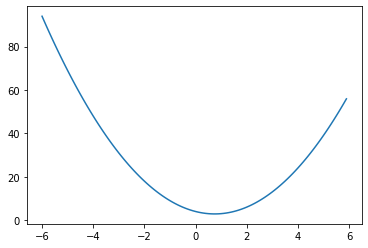

In [3]:
x = np.arange(-6, 6, step=0.1)
fx = f(x)
plt.plot(x, fx);

Here are the outputs of the function for various inputs:

In [4]:
for x in [-3, -1, 2, 4]:
    print(f'When x = {x:2}, the value of f(x) = {f(x)}')

When x = -3, the value of f(x) = 31
When x = -1, the value of f(x) = 9
When x =  2, the value of f(x) = 6
When x =  4, the value of f(x) = 24


# Gradients

A useful thing to know about functions is its slopes (or gradients).

If we revisit our primary school maths class, we'll remember slope of a line equals rise over run, where rise is the change in the vertical axis $f(x)$, and run is the change in the horizontal axis $x$.

$$\text{Slope} = \frac{\text{Rise}}{\text{Run}} = \frac{\Delta f(x)}{\Delta x} $$

__This is how we were taught__

1) Pick the a value of $x$ that you want to know the slope of

2) Calculate the height of the function $f(x)$

3) Pick another value $x+h$, where $h$ is a small value, so $x+h$ is very close to $x$

4) Calculate the new height of the function $f(x+h)$

5) Run is the change in position expressed as $\Delta x = (x+h) - x$

6) Rise is the change in height expressed as $\Delta f(x) = f(x+h) - f(x)$

7) Divide rise by run to get the slope

__Expressed as one equation__

$$\text{Slope} = \frac{f(x+h) - f(x)}{(x+h) - x} =\frac{f(x+h) - f(x)}{h} $$

This gives you the slope of a straight line. Inconveniently, not all functions, including the one above, are straight lines.

However, if you look 👀🔎 __very very closely__ 🔍👀 - like 1200 times more closely, they start to look like lines.

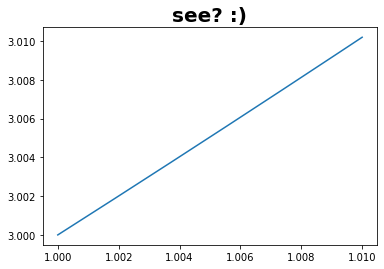

In [5]:
x = np.arange(1.00, 1.01, step=1e-5); fx = f(x)
plt.plot(x, fx)
plt.title('see? :)', fontweight='bold', fontsize=20);

So, if we make our $h$ small enough, we can get a pretty good approximation of the slope!

Here's our calculation of the (approximate) slope of what's shown above, with $x=1.00$ and $h=0.01$

In [6]:
h = 0.01
x = 1.00
(f(x+h)-f(x))/h

1.0199999999999765

Since our function is a relatively simple polynomial function, we can use the power rule to calculate the derivative by hand.

$$f(x) = 2x^2 + 3x - 4$$

__Power Rule__

The derivative of expressions in the form of $x^n$ can be calculated as:

$$ \frac{d}{dx} x^n = n \cdot x^{n-1} $$

Applying the power rule element-wise
- $ \frac{d}{dx} 2x^2 = 2 \cdot 2x^1 = 4x$
- $ \frac{d}{dx} -3x^1 = 1 \cdot -3x^0 = -3$
- $ \frac{d}{dx} 4 = 0$

Adding everything up
$$\frac{d}{dx}f(x) = f'(x) = 4x - 3$$

In [7]:
def d_f(x):
    return 4*x - 3

d_f(1)

1

Plugging in x = 1, we get $4 \cdot 1 - 3 = 1$, which is pretty close to what we calculated in the cell above - but not exact.

Now, let's try making our interval $h$ 10x, 100x, and 1000x smaller:

In [8]:
x = 1.00

h = 0.01/10
print('10x smaller:  ', (f(x+h)-f(x))/h)

h = 0.01/100
print('100x smaller: ', (f(x+h)-f(x))/h)

h = 0.01/1000
print('1000x smaller:', (f(x+h)-f(x))/h)

10x smaller:   1.0019999999997253
100x smaller:  1.000199999996454
1000x smaller: 1.000020000008206


You'll notice as $h$ gets smaller, we're getting closer and closer to the actual derivative - let's plot it.

On the horizontal axis is our decreasing step sizes $h$, and on the vertical axis is the difference between the approximate and actual derivatives:

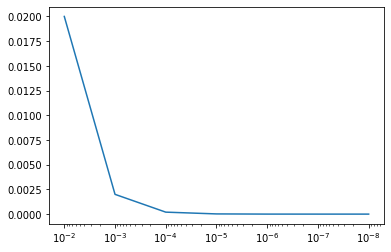

In [9]:
h = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
dfx = (f(x+h)-f(x))/h
plt.plot(h, dfx - d_f(x))
plt.xscale('log')
plt.gca().invert_xaxis();

In fact, as we shrink $h$ towards an infinitesimally small number, we get the definition of the derivative of a line.

$$\text{Derivative} = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

Expressed differently, if we adjust the input variable $x$ by a tiny value $h$, we can expect a change in the value of $f(x)$ to be the value of the gradient.

__The gradient is how a change in $x$ will affect $f(x)$__

We can also express this using the following notation:

$$\frac{\partial}{\partial x} f(x) =  \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} = \nabla x $$

This notation is particularly useful when our functions start to take more than one input, where each input has its own affect on the output. 

The simplest example of a multivariate function brings us back to perhaps the simplest mathematical operation - addition:

$$f(a, b) = a + b$$

### Quick Note on Gradients vs Derivatives

For univariate functions, derivative and gradient are equivalent.

For multivariate functions, the gradient is a vector of partial derivatives, while the directional derivative is a scalar representing the instantaneous rate of change, or the magnitude of the slope in the steepest direction.

__Gradient__
$$ \nabla f(a, b) = \langle \frac{\partial}{\partial a} f(a ,b), \frac{\partial}{\partial b} f(a ,b) \rangle = \langle 1, 1 \rangle$$
- This is the more important concept when it comes to neural networks

__Directional Derivative__
$$
\begin{equation}
\begin{aligned}
D_u f(a, b) &=  \nabla f(a, b) \cdot \vec{\textbf{u}} \\
&= \langle 1, 1 \rangle \cdot \langle \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \rangle \\
&= \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}} \\
&= \sqrt{2}
\end{aligned}
\end{equation}
$$
- Where $\vec{\textbf{u}}$ is the unit vector in the direction of gradient

### Gradients of a Multivariate Function

$a+b$ is a bit too trivial to use as an example, so let's throw in multiplication too

$$f(a, b, c) = a*b + c$$

In [10]:
def f(a, b, c):
    return a * b + c

This time, we can't plot it nicely - we would need 4 dimensions (one each for $a$, $b$, $c$, and $f(a,b,c)$).

In [11]:
# pick some values for the inputs
a = 2.0
b = -1.0
c = 3.0

# calculate the output
f(a, b, c)

1.0

But, our previous way of calculating gradient using small $h$ still works, we can estimate how changes in each variable affects the output.

In [12]:
# pick a small h
h = 1e-10

gradient_a = (f(a+h, b, c) - f(a, b, c)) / h
print('Derivative with respect to a: ', gradient_a)

gradient_b = (f(a, b+h, c) - f(a, b, c)) / h
print('Derivative with respect to b: ', gradient_b)

gradient_c = (f(a, b, c+h) - f(a, b, c)) / h
print('Derivative with respect to c: ', gradient_c)

Derivative with respect to a:  -1.000000082740371
Derivative with respect to b:  2.000000165480742
Derivative with respect to c:  1.000000082740371


The reason we get the trailing 0/9s and rather than nice whole numbers is a result the comptuers of not being able to precisely express very small decimal numbers in binary (0s & 1s) - this is called floating point precision error.

It's also the same reason that this happens:

In [13]:
0.1 + 0.2

0.30000000000000004

But overlooking that and rounding those numbers to integers, these values make complete sense:
 - If $a$ increases from 2 to 3, it will be multiplied by -1 (the value of $b$) and change the output by -1.
 - If $b$ increases from -1 to 0, it will be multiplied by 2 (the value of $a$) and change the output by 2.
 - If $c$ increases from 3 to 4, it will obviously change the output by 1.
 
Pick some different values for $a$, $b$, $c$ and observe how the gradients change for yourself. You'll notice that:
 - The gradient of $a$ is always $b$, or $\frac{\partial f(a, b, c)}{\partial a} = b$
 - The gradient of $b$ is always $a$, or $\frac{\partial f(a, b, c)}{\partial b} = a$
 - The gradient of $c$ is always $1$, or $\frac{\partial f(a, b, c)}{\partial c} = 1$

### Chaining Operations

Although this example was pretty straightforward, calculating derivatives of functions with multiple (more than 2) variables can get complicated.

Luckily, if we recall order of operations, we need not calculate everything at once - we can calculate one thing at a time, dealing with 2 inputs and 1 operation at each step.

To calculate $ a \cdot b + c$, we can chain our operations with these steps

 - Calculate $a \cdot b$ to get $(a \cdot b) = 2 \cdot  -1 = -2$

 - Add $c$ to get $(a \cdot b) + c = -2 + 3 = 1$

Once we break it down like this, our observations make sense:

- $\frac{d}{da} (a\cdot b) = 1 \cdot b = b$
- $\frac{d}{db} (a\cdot b) = a \cdot 1 = a$
- $\frac{d}{dc} ((a \cdot b) + c) = 0 + 1 = 1$

# Wrapping Up

In hopes of keeping each notebook relatively short and digestible we'll end the discussion on functions and gradients here. You might be asking why we spent a whole notebook deriving derivatives (lol), neural networks don't even nuse this "tiny $h$" approach.

But we went the long way because I think an intuitive and fundamental understanding of gradients is pretty important to understanding neural networks.

__Main Takeaways__
1) The gradient is how changes in inputs affects the output.

2) We can break down complex functions into smaller parts and "chain" them together.